##Install Env

In [1]:
!sudo add-apt-repository ppa:sumo/stable
!sudo apt-get update
!sudo apt-get install sumo sumo-tools sumo-doc 

 SUMO is a highly portable, microscopic traffic simulation package designed to handle large road networks. SUMO is open source, licensed under the EPLv2.
 More info: https://launchpad.net/~sumo/+archive/ubuntu/stable
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://security.ubuntu.com/ubuntu

In [2]:
#"Please declare the environment variable 'SUMO_HOME'" 문제 해결 
import os
os.environ['SUMO_HOME'] = "/usr/share/sumo"
!export LIBSUMO_AS_TRACI=1

In [3]:
!pip install sumo-rl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 7.1 MB/s 
     |████████████████████████████████| 144 kB 49.0 MB/s 
     |████████████████████████████████| 796 kB 52.6 MB/s 
     |████████████████████████████████| 694 kB 49.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.24.0-py3-none-any.whl size=790707 sha256=46249318880a7e968f7e580a9626743e3b4983d80c218e40d99eeeeaf1c981fd
  Stored in directory: /root/.cache/pip/wheels/9b/47/57/bc885affe6e76f253f44982605bc912d681e890e3ceaa74254
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [4]:
!git clone https://github.com/LucasAlegre/sumo-rl
%cd sumo-rl
!pip install -e .

Cloning into 'sumo-rl'...
remote: Enumerating objects: 1952, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 1952 (delta 115), reused 150 (delta 98), pack-reused 1771
Receiving objects: 100% (1952/1952), 41.61 MiB | 17.68 MiB/s, done.
Resolving deltas: 100% (918/918), done.
/content/sumo-rl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/sumo-rl
     |████████████████████████████████| 836 kB 5.0 MB/s 
     |████████████████████████████████| 816 kB 40.2 MB/s 
  Attempting uninstall: pettingzoo
    Found existing installation: PettingZoo 1.18.1
    Uninstalling PettingZoo-1.18.1:
      Successfully uninstalled PettingZoo-1.18.1
  Attempting uninstall: sumo-rl
    Found existing installation: sumo-rl 1.3.0
    Uninstalling sumo-rl-1.3.0:
      Successfully uninstalled sumo-rl-1.3.0
  Running setup.py develop for sumo-rl


#Environment Setting

In [5]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np 
import sumo_rl

In [6]:
env = gym.make('sumo-rl-v0',
                net_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection.net.xml',
                route_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection-vhvh.rou.xml',
                out_csv_name='outputs/2way-single-intersection/dqn',
                single_agent=True,
                num_seconds=100000)

obs, info = env.reset()
done = False


print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

for i in range(20): 
    print(env.action_space.sample())
    next_obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
    done = terminated or truncated

    print('terminated :',terminated)
    print('truncated :', truncated)
    print('next_obs :', next_obs)
    print('reward :',reward)
    if done: 
        break 

env.close()

 Retrying in 1 seconds
 Retrying in 1 seconds


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Observation space: Box(0.0, 1.0, (21,), float32)
Action space: Discrete(4)
0
terminated : False
truncated : False
next_obs : [1.         0.         0.         0.         0.         0.10567101
 0.05283551 0.10567101 0.05283551 0.10567101 0.05283551 0.10567101
 0.05283551 0.         0.         0.         0.         0.
 0.         0.         0.        ]
reward : 0.0
0
terminated : False
truncated : False
next_obs : [1.         0.         0.         0.         1.         0.10567101
 0.05283551 0.10567101 0.05283551 0.05283551 0.05283551 0.10567101
 0.05283551 0.         0.         0.         0.         0.
 0.         0.         0.        ]
reward : 0.0
3
terminated : False
truncated : False
next_obs : [0.         0.         1.         0.         0.         0.15850651
 0.10567101 0.         0.05283551 0.15850651 0.10567101 0.
 0.05283551 0.         0.         0.         0.         0.05283551
 0.05283551 0.         0.        ]
reward : -0.03
0
terminated : False
truncated : False
next_obs : 

# Actor Critic Training

In [18]:
import tensorflow as tf
import tensorflow_probability as tfp

In [10]:
class Critic(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.d1 = tf.keras.layers.Dense(128,activation='relu')
    self.d2 = tf.keras.layers.Dense(64,activation='relu')
    self.v = tf.keras.layers.Dense(1, activation = None)

  def call(self, input_data):
    x = self.d1(input_data)
    x = self.d2(x)
    v = self.v(x)
    return v
    

class Actor(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.d1 = tf.keras.layers.Dense(128,activation='relu')
    self.d2 = tf.keras.layers.Dense(64,activation='relu')
    self.a = tf.keras.layers.Dense(4,activation='softmax')

  def call(self, input_data):
    x = self.d1(input_data)
    x = self.d2(x)
    a = self.a(x)
    return a

In [21]:
class Agent():
    def __init__(self, gamma = 0.99):
        self.gamma = gamma
        self.a_opt = tf.keras.optimizers.Adam(learning_rate=5e-6)
        self.c_opt = tf.keras.optimizers.Adam(learning_rate=5e-6)
        self.actor = Actor()
        self.critic = Critic()

    def act(self,state):
        prob = self.actor(np.array([state]))
        #print(prob)
        # print(prob)
        prob = prob.numpy()
        dist = tfp.distributions.Categorical(probs=prob, dtype=tf.float32)
        action = dist.sample()
        return int(action.numpy()[0])

    
    def actor_loss(self, prob, action, td):
        dist = tfp.distributions.Categorical(probs=prob, dtype=tf.float32)
        log_prob = dist.log_prob(action)
        loss = -log_prob*td
        return loss

    def learn(self, state, action, reward, next_state, done):
        state = np.array([state])
        next_state = np.array([next_state])
        with tf.GradientTape() as tape1, tf.GradientTape() as tape2:
            p = self.actor(state, training=True)
            v =  self.critic(state,training=True)
            vn = self.critic(next_state, training=True)
            td = reward + self.gamma*vn*(1-int(done)) - v
            a_loss = self.actor_loss(p, action, td)
            c_loss = td**2
        grads1 = tape1.gradient(a_loss, self.actor.trainable_variables)
        grads2 = tape2.gradient(c_loss, self.critic.trainable_variables)
        self.a_opt.apply_gradients(zip(grads1, self.actor.trainable_variables))
        self.c_opt.apply_gradients(zip(grads2, self.critic.trainable_variables))
        return a_loss, c_loss

In [39]:
env = gym.make('sumo-rl-v0',
                net_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection.net.xml',
                route_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection-vhvh.rou.xml',
                out_csv_name='outputs/2way-single-intersection/dqn',
                single_agent=True,
                num_seconds=100000)

 Retrying in 1 seconds


In [ ]:
agentoo7 = Agent()
steps = 800
rewards = []
for s in range(steps):
  
  done = False
  state, _ = env.reset()
  total_reward = 0
  all_aloss = []
  all_closs = []
  
  for _  in range(500):
    #env.render()
    action = agentoo7.act(state)
    #print(action)
    next_state, reward, done, _, _ = env.step(action)
    aloss, closs = agentoo7.learn(state, action, reward, next_state, done)
    all_aloss.append(aloss)
    all_closs.append(closs)
    state = next_state
    total_reward += reward
    
    # if done:
      
      #print("total step for this episord are {}".format(t))
  print("total reward after {} steps is {}".format(s, total_reward))
  rewards.append(total_reward)

 Retrying in 1 seconds
total reward after 0 steps is -59.65
 Retrying in 1 seconds
total reward after 1 steps is -15.36
 Retrying in 1 seconds
total reward after 2 steps is -8.66
 Retrying in 1 seconds
total reward after 3 steps is -23.07
 Retrying in 1 seconds
total reward after 4 steps is -20.39
 Retrying in 1 seconds
total reward after 5 steps is -41.73
 Retrying in 1 seconds
total reward after 6 steps is -20.82
 Retrying in 1 seconds
total reward after 7 steps is -32.39
 Retrying in 1 seconds
total reward after 8 steps is -54.85
 Retrying in 1 seconds
total reward after 9 steps is -9.22
 Retrying in 1 seconds
total reward after 10 steps is -34.09
 Retrying in 1 seconds
total reward after 11 steps is -32.96
 Retrying in 1 seconds
total reward after 12 steps is -42.17
 Retrying in 1 seconds
total reward after 13 steps is -20.98
 Retrying in 1 seconds
total reward after 14 steps is -14.33
 Retrying in 1 seconds
total reward after 15 steps is -32.47
 Retrying in 1 seconds
total reward 

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

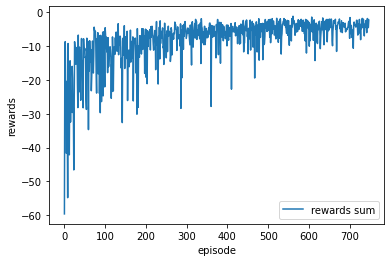

<IPython.core.display.Javascript object>

In [41]:
import matplotlib.pyplot as plt
from google.colab import widgets

#rewards per episode 
episode_list = [i for i in range(len(rewards))]
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards,label='rewards sum')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()

#Testing

In [43]:
!unzip /content/actor_model.zip -d /content/
!unzip /content/critic_model.zip -d /content/

Archive:  /content/actor_model.zip
caution: filename not matched:  actor_model
Archive:  /content/critic_model.zip
caution: filename not matched:  critic_model


In [52]:
# 사전학습될 모델 사용할 때 사용
# 위 코드로 직접 학습하고, 위에서 직접 학습한 코드로 테스트 하기 위해서는 이 코드는 실행하지 않아야 합니다.
# 첨부 파일로 된 actor_model.zip과 critic.zip 파일을 /content/ 경로에 넣고 위 코드를 통해 압축 해제 후 실행해주세요
import keras

class Agent():
    def __init__(self, gamma = 0.99):
        self.gamma = gamma
        self.a_opt = tf.keras.optimizers.Adam(learning_rate=5e-6)
        self.c_opt = tf.keras.optimizers.Adam(learning_rate=5e-6)
        self.actor = keras.models.load_model("/content/actor_model")
        self.critic = keras.models.load_model("/content/critic_model")

    def act(self,state):
        prob = self.actor(np.array([state]))
        #print(prob)
        # print(prob)
        prob = prob.numpy()
        dist = tfp.distributions.Categorical(probs=prob, dtype=tf.float32)
        action = dist.sample()
        return int(action.numpy()[0])

    
    def actor_loss(self, prob, action, td):
        dist = tfp.distributions.Categorical(probs=prob, dtype=tf.float32)
        log_prob = dist.log_prob(action)
        loss = -log_prob*td
        return loss

    def learn(self, state, action, reward, next_state, done):
        state = np.array([state])
        next_state = np.array([next_state])
        with tf.GradientTape() as tape1, tf.GradientTape() as tape2:
            p = self.actor(state, training=True)
            v =  self.critic(state,training=True)
            vn = self.critic(next_state, training=True)
            td = reward + self.gamma*vn*(1-int(done)) - v
            a_loss = self.actor_loss(p, action, td)
            c_loss = td**2
        grads1 = tape1.gradient(a_loss, self.actor.trainable_variables)
        grads2 = tape2.gradient(c_loss, self.critic.trainable_variables)
        self.a_opt.apply_gradients(zip(grads1, self.actor.trainable_variables))
        self.c_opt.apply_gradients(zip(grads2, self.critic.trainable_variables))
        return a_loss, c_loss

agentoo7 = Agent()

In [54]:
env = gym.make('sumo-rl-v0',
                net_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection.net.xml',
                route_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection-vhvh.rou.xml',
                out_csv_name='outputs/2way-single-intersection/dqn',
                single_agent=True,
                num_seconds=100000)

 Retrying in 1 seconds


In [50]:
import tensorflow as tf
import tensorflow_probability as tfp
import keras

In [ ]:
rewards2 = []
for s in range(110):
  
  done = False
  state, _ = env.reset()
  total_reward = 0
  all_aloss = []
  all_closs = []
  
  for _  in range(500):
    #env.render()
    action = agentoo7.act(state)
    #print(action)
    next_state, reward, done, _, _ = env.step(action)
    # aloss, closs = agentoo7.learn(state, action, reward, next_state, done)
    # all_aloss.append(aloss)
    # all_closs.append(closs)
    state = next_state
    total_reward += reward
    
    # if done:
      
      #print("total step for this episord are {}".format(t))
  print("total reward after {} steps is {}".format(s, total_reward))
  rewards2.append(total_reward)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

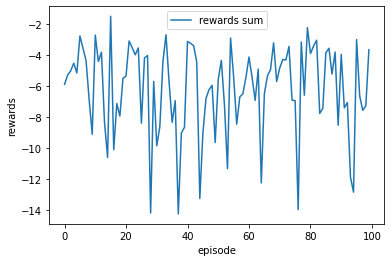

<IPython.core.display.Javascript object>

In [61]:
import matplotlib.pyplot as plt
from google.colab import widgets

#rewards per episode 
output_grid = widgets.Grid(1, 1)
episode_list2 = [i for i in range(len(rewards2))]
with output_grid.output_to(0, 0):
  plt.plot(episode_list2,rewards2,label='rewards sum')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()